In [164]:
import time
import warnings

from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from itertools import cycle, islice

import timeit

In [165]:
# distance calculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)



In [166]:
n_samples=1000


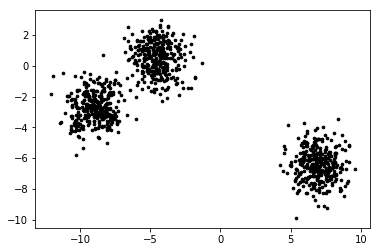

In [167]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=15)

points_blobs=blobs[0]

f1=points_blobs[0:((n_samples)), 0]
f2=points_blobs[0:((n_samples)), 1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [168]:

k_all=(2,3,5,10) # hier kann man die Anzahl an k, die man vergleichen will, einfach eingeben

runtime_own = np.zeros(4)

for l in range(4):
    k=k_all[l]
    
    times_to_repeat = 10

    sum_runtime = 0
    
    
    for j in range (times_to_repeat):


        start_time = timeit.default_timer()


        Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid


        C=X[Indecies_centroid]

        clusters = np.zeros(len(X))
        C_old = np.zeros(C.shape)
        error = dist(C, C_old) # Konvergenz
        from copy import deepcopy

        while error.all() != 0:
            for i in range(len(X)):
                    distances = dist(C,[X[i]])
                    cluster = np.argmin(distances)
                    clusters[i] = cluster
            C_old = deepcopy(C)
            for i in range(k):
                points = [X[j] for j in range(len(X)) if clusters[j] == i]
                C[i] = np.mean(points, axis=0)
            error = dist(C, C_old)


        
        runtime= timeit.default_timer() - start_time
    
        sum_runtime= sum_runtime+runtime
  

    average_runtime= (sum_runtime/times_to_repeat)
    
    
    runtime_own[l]=average_runtime
   
    print(runtime_own)
        



[0.07976123 0.         0.         0.        ]
[0.07976123 0.06588464 0.         0.        ]
[0.07976123 0.06588464 0.09796075 0.        ]
[0.07976123 0.06588464 0.09796075 0.22943569]


## scikit learn implementation

In [171]:
n_clusters=(2,3,5,10)

runtime_scikit = np.zeros(4)

for l in range(4):
    

    times_to_repeat = 10

    sum_runtime = 0

    for i in range (times_to_repeat):


        start_time = timeit.default_timer()

        kmeans = KMeans(n_clusters[l]).fit_predict(X)


        runtime= timeit.default_timer() - start_time
    
        sum_runtime= sum_runtime+runtime
    
    average_runtime= sum_runtime/times_to_repeat
    
    runtime_scikit[l]=average_runtime
   

print(runtime_scikit)
        
    

   



[0.02229983 0.02441598 0.06596999 0.09704684]


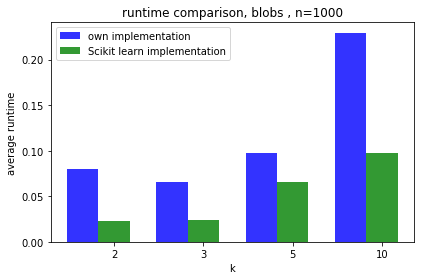

In [172]:
## hab hier alles so angepasst, dass Beschriftungen alle automatisch passen, je nach dem wie man n_samples, k etc verändert hat

# data to plot
n_groups = 4
means_own = (runtime_own)
means_scikit = (runtime_scikit)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_own, bar_width,
alpha=opacity,
color='b',
label='own implementation')

rects2 = plt.bar(index + bar_width, means_scikit, bar_width,
alpha=opacity,
color='g',
label='Scikit learn implementation')

plt.xlabel('k')
plt.ylabel('average runtime')
plt.title('runtime comparison, blobs , n=' +  str(n_samples))
plt.xticks(index + bar_width, (k_all))
plt.legend()

plt.tight_layout()
plt.show()
